<a href="https://colab.research.google.com/github/tewei0328/visulization/blob/main/viz2_0050_0056_plotly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 29.7 MB/s 
     |████████████████████████████████| 63 kB 756 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


#Yahoo Finance
https://finance.yahoo.com/world-indices

In [ ]:
import yfinance
stock1=yfinance.Ticker('0050.TW')
df1=stock1.history(period='1y')
df1.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-03-22,132.399994,133.600006,131.600006,133.399994,5306034,0,0
2021-03-23,133.899994,134.699997,133.600006,133.600006,6866901,0,0
2021-03-24,131.800003,132.449997,131.300003,131.500000,10243129,0,0
2021-03-25,131.100006,132.550003,130.600006,131.949997,4885017,0,0
2021-03-26,133.050003,134.399994,132.550003,134.350006,7969939,0,0


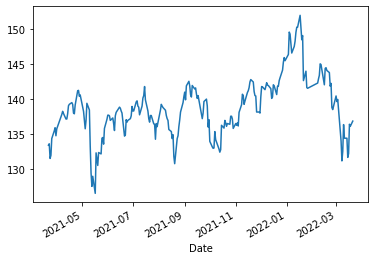

In [ ]:
df1.Close.plot()

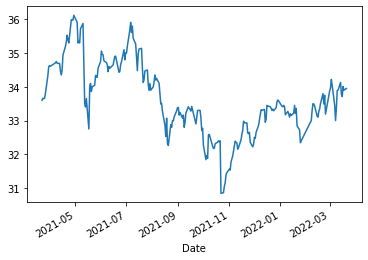

In [ ]:
stock2=yfinance.Ticker('0056.TW')
df2=stock2.history(period='1y')
df2.head()
df2.Close.plot()

In [ ]:
import pandas as pd
df_many = pd.concat([df1.Close, df2.Close], axis=1)
df_many.columns=['0050','0056']

In [ ]:
df_many.head()

,0050,0056
Date,,
2021-03-22,133.399994,33.599998
2021-03-23,133.600006,33.660000
2021-03-24,131.500000,33.650002
2021-03-25,131.949997,33.660000
2021-03-26,134.350006,33.799999


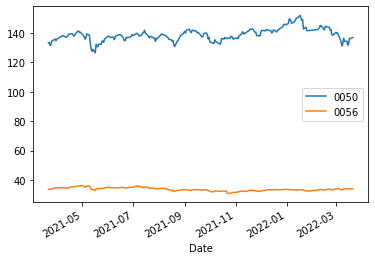

In [ ]:
df_many.plot()

In [ ]:
df_many['0050']=df_many['0050']/df_many.iloc[0][0]
df_many['0056']=df_many['0056']/df_many.iloc[0][1]

In [ ]:
df_many.head()

,0050,0056
Date,,
2021-03-22,1.000000,1.000000
2021-03-23,1.001499,1.001786
2021-03-24,0.985757,1.001488
2021-03-25,0.989130,1.001786
2021-03-26,1.007122,1.005952


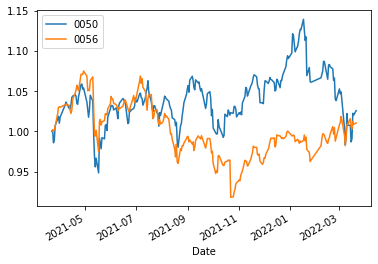

In [ ]:
df_many.plot()

#畫Plotly版互動圖
##要有Date欄位才可
https://youtu.be/ifYuglP0pPQ

In [ ]:
df=df_many

In [ ]:
df.head()

,0050,0056
Date,,
2021-03-22,1.000000,1.000000
2021-03-23,1.001499,1.001786
2021-03-24,0.985757,1.001488
2021-03-25,0.989130,1.001786
2021-03-26,1.007122,1.005952


In [ ]:
df['Date']=df.index

In [ ]:
df.head()

,0050,0056,Date
Date,,,
2021-03-22,1.000000,1.000000,2021-03-22
2021-03-23,1.001499,1.001786,2021-03-23
2021-03-24,0.985757,1.001488,2021-03-24
2021-03-25,0.989130,1.001786,2021-03-25
2021-03-26,1.007122,1.005952,2021-03-26


In [ ]:
import plotly.graph_objects as go
line1 = go.Scatter(x=df['Date'], y=df['0050'], name='0050')
fig  = go.Figure(line1)
fig.show()

In [ ]:
line1 = go.Scatter(x=df['Date'], y=df['0050'], name='0050')
fig  = go.Figure(line1)
line2 = go.Scatter(x=df['Date'], y=df['0056'], name='0056')
fig  = go.Figure([line1,line2])
fig.show()